In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


Using TensorFlow backend.
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
# #### Hold out Zeros

# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')

# data[data.iloc[:,2]==0].to_csv('../../triple_cosineSNF(zeros).csv',index=False)
# del data

In [3]:
# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')
# data = data[data['2']!=0]
# data.to_csv('triple_cosineSNF(-1and1).csv',index=False)


In [22]:
dataTrain = pd.read_csv('../../triple42702.csv')
dataTest = pd.read_csv('../../tripleTest.csv')
# dataTest = pd.read_csv('../../triple_cosineSNF(zeros).csv')

# print(dataTest.shape,dataTrain.shape)

In [20]:
# dataTest.head()

In [21]:
# X_train = dataTrain.values[:,3:]
# y_train = dataTrain.values[:,2].astype(int)
# del dataTrain
# # X_test = dataTest.values[:,3:]
# # y_test = dataTest.values[:,2].astype(int)


In [22]:
# trainNum = len(X_train)

In [23]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

In [24]:
16*71

1136

In [25]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

In [26]:
# X_train.shape

In [27]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

In [28]:
# y_train

In [29]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

# #one-hot encode target column
# # y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# # y_test[0]

In [30]:
# y_train

In [3]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2].astype(int)
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2].astype(int)
del dataTest
testNum = len(X_test)

#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
print(y_train[0], y_test[0])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]


0.0 1.0


In [4]:
#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense( 2, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
# model.load_weights('cnn42702(1and-1)dense1024to64.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                222272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
__________

In [33]:
# #### plotting model
# plot_model(model,show_shapes = True, to_file='modeldense1024to64.png')

In [16]:
# #### train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)
# model.fit(X_train, y_train, epochs=10)


Train on 42702 samples, validate on 4302 samples
Epoch 1/1
42702/42702 [==============================] - 552s 13ms/step - loss: 0.0816 - acc: 0.9632 - val_loss: 0.0534 - val_acc: 0.9737


In [17]:
### Saveing the Model
model.save_weights('cnn42702(1and-1)_without softmax.h5')


In [18]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
print(predit[:4])



[[2.9920871e-04 9.7462308e-01]
 [1.0439710e-02 8.4623641e-01]
 [2.9884008e-04 9.9994528e-01]
 [4.1422645e-05 9.9946886e-01]]


In [19]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

0.9295364124341745 0.9832388846598438


In [20]:
model.history.history['val_acc']

[0.9737331473733147]

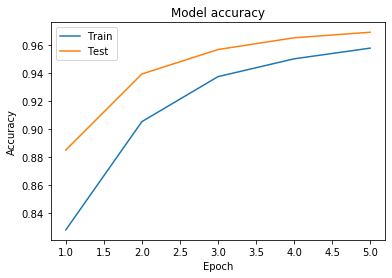

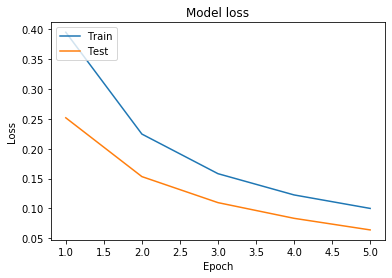

In [11]:

# Plot training & validation accuracy values
plt.plot(list(range(1,6)),model.history.history['acc'])
plt.plot(list(range(1,6)),model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(list(range(1,6)),model.history.history['loss'])
plt.plot(list(range(1,6)),model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
# # predit
# predit[:,0].shape 

In [21]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)

In [43]:
predicts = []
e = d = z = 0

for a,b in predit:
    if a >=0.9:
        predicts.append(0)
        d += 1
    elif b>=0.9:
        predicts.append(2)
        e += 1
    else:
        predicts.append(1)
        z += 1
print('degrassive', d, 'enhancive', e, 'zeros', z)

degrassive 203 enhancive 2683 zeros 1416


In [44]:
max(list((dataTest.values[:,2]+1)/2))

1.0

In [47]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)),list(predicts))
print(CR)
print(145/4702)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)/2), list(predicts))


[[ 197    0    6]
 [ 690    0  726]
 [  37    0 2646]]
              precision    recall  f1-score   support

           0       0.97      0.21      0.35       924
           1       0.00      0.00      0.00         0
           2       0.99      0.78      0.87      3378

    accuracy                           0.66      4302
   macro avg       0.65      0.33      0.41      4302
weighted avg       0.98      0.66      0.76      4302

0.030837941301573798


ValueError: Shape of passed values is (3, 3), indices imply (2, 2)

In [33]:
print(pd.DataFrame(predit))

                 0         1
0     2.992087e-04  0.974623
1     1.043971e-02  0.846236
2     2.988401e-04  0.999945
3     4.142265e-05  0.999469
4     3.317396e-03  0.897726
...            ...       ...
4297  5.301476e-01  0.004191
4298  2.685367e-03  0.826500
4299  9.307350e-06  0.999747
4300  7.264235e-07  0.999762
4301  1.125297e-03  0.789796

[4302 rows x 2 columns]


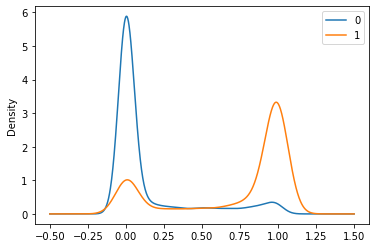

In [34]:
pd.DataFrame(predit).plot.density()


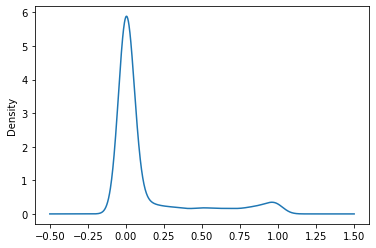

In [35]:
pd.DataFrame(predit).iloc[:,0].plot.density()

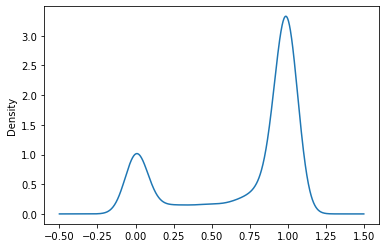

In [36]:
pd.DataFrame(predit).iloc[:,1].plot.density()

Text(0, 0.5, 'frequency distribution')

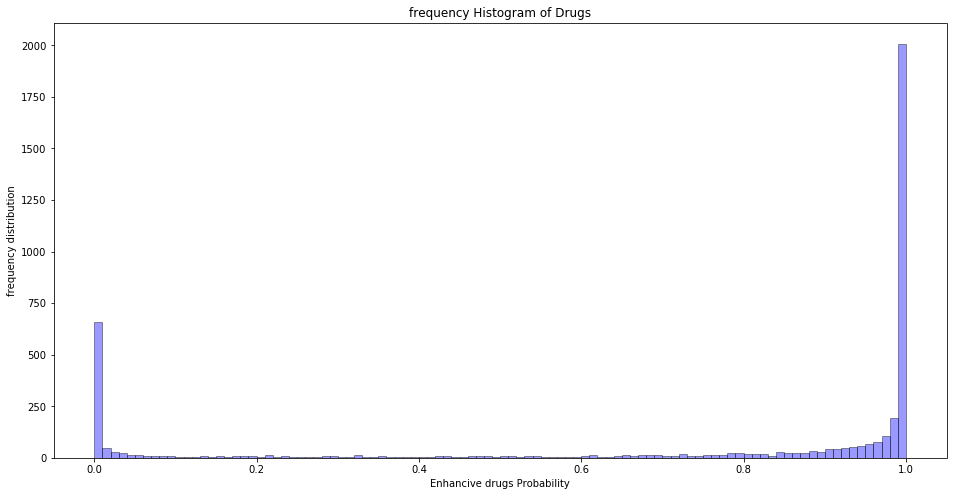

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')


Text(0, 0.5, 'frequency distribution')

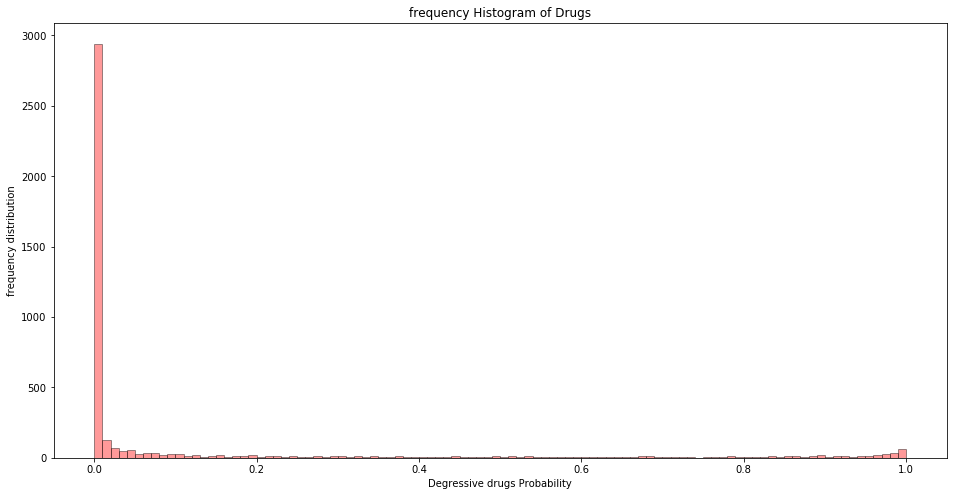

In [38]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')

Text(0, 0.5, 'frequency distribution')

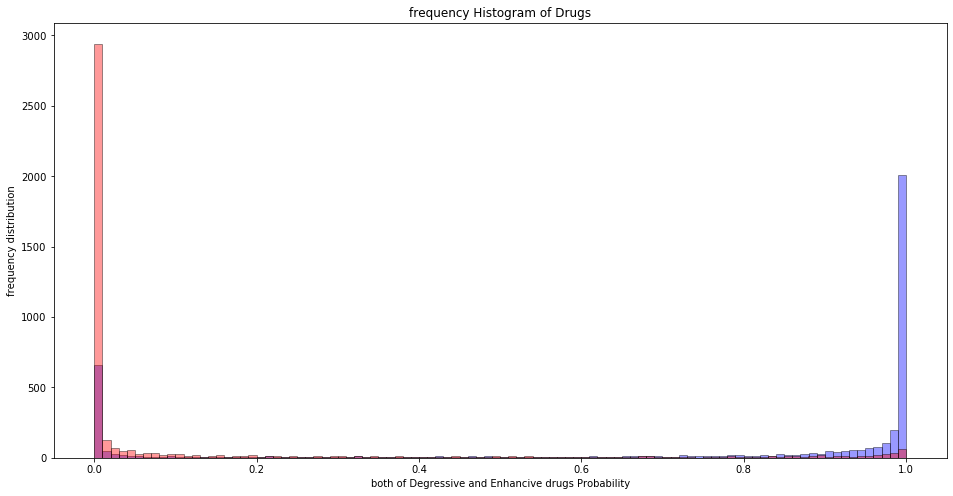

In [39]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')